## Data manipulation

### import libraries


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
#imported different libraries where we will be working with.

In [2]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)

### importing dataset

In [3]:
PATH = 'D:/project/study/kaggle/data/Seoul bike sharing demand prediction/'
df = pd.read_csv(PATH + 'SeoulBikeData.csv', encoding='unicode_escape', parse_dates=[0])

# parse+dates는 날짜를 datetime형태로 변환할지 여부, True인 경우 날짜 형태로 변환
# parse_dates=[0] 첫번째(0번째) 컬럼을 datetime 형태로 변환

### Dataset View

In [5]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [7]:
df=df.astype({'Rented Bike Count':'float','Hour':'object'})
# astype 데이터 타입 변환함수

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   float64       
 2   Hour                       8760 non-null   object        
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [10]:
df=df.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility','Solar Radiation (MJ/m2)':'Radiation','Dew point temperature(°C)':'Dew point temperature'})

### Summary Statistics 

In [12]:
df.describe()

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [11]:
df.describe().style.background_gradient()
# style.background_gradient() 확실히 눈에 더 잘 보인다

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Checking for unique values in all attribute 

In [13]:
df.nunique().sort_values(ascending=True)

Holiday                     2
Functioning Day             2
Seasons                     4
Hour                       24
Snowfall                   51
Rainfall                   61
Wind speed                 65
Humidity                   90
Radiation                 345
Date                      365
Temperature               546
Dew point temperature     556
Visibility               1789
Rented Bike Count        2166
dtype: int64

### Checking for missing values in each column

In [16]:
df.isnull().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Radiation                0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

### percentage of missing values in each column

In [5]:
pd.options.display.float_format = '{:,.2f} %'.format
print((df.isnull().sum()/len(df))*100)

Date                        0.00 %
Rented Bike Count           0.00 %
Hour                        0.00 %
Temperature(°C)             0.00 %
Humidity(%)                 0.00 %
Wind speed (m/s)            0.00 %
Visibility (10m)            0.00 %
Dew point temperature(°C)   0.00 %
Solar Radiation (MJ/m2)     0.00 %
Rainfall(mm)                0.00 %
Snowfall (cm)               0.00 %
Seasons                     0.00 %
Holiday                     0.00 %
Functioning Day             0.00 %
dtype: float64


In [4]:
pd.options.display.float_format = '{:,.2f}'.format
print((df.isnull().sum()/len(df))*100)

Date                        0.00
Rented Bike Count           0.00
Hour                        0.00
Temperature(°C)             0.00
Humidity(%)                 0.00
Wind speed (m/s)            0.00
Visibility (10m)            0.00
Dew point temperature(°C)   0.00
Solar Radiation (MJ/m2)     0.00
Rainfall(mm)                0.00
Snowfall (cm)               0.00
Seasons                     0.00
Holiday                     0.00
Functioning Day             0.00
dtype: float64


## Data Visualization

### Missing Value Plot 

In [19]:
import missingno as msno

<AxesSubplot:>

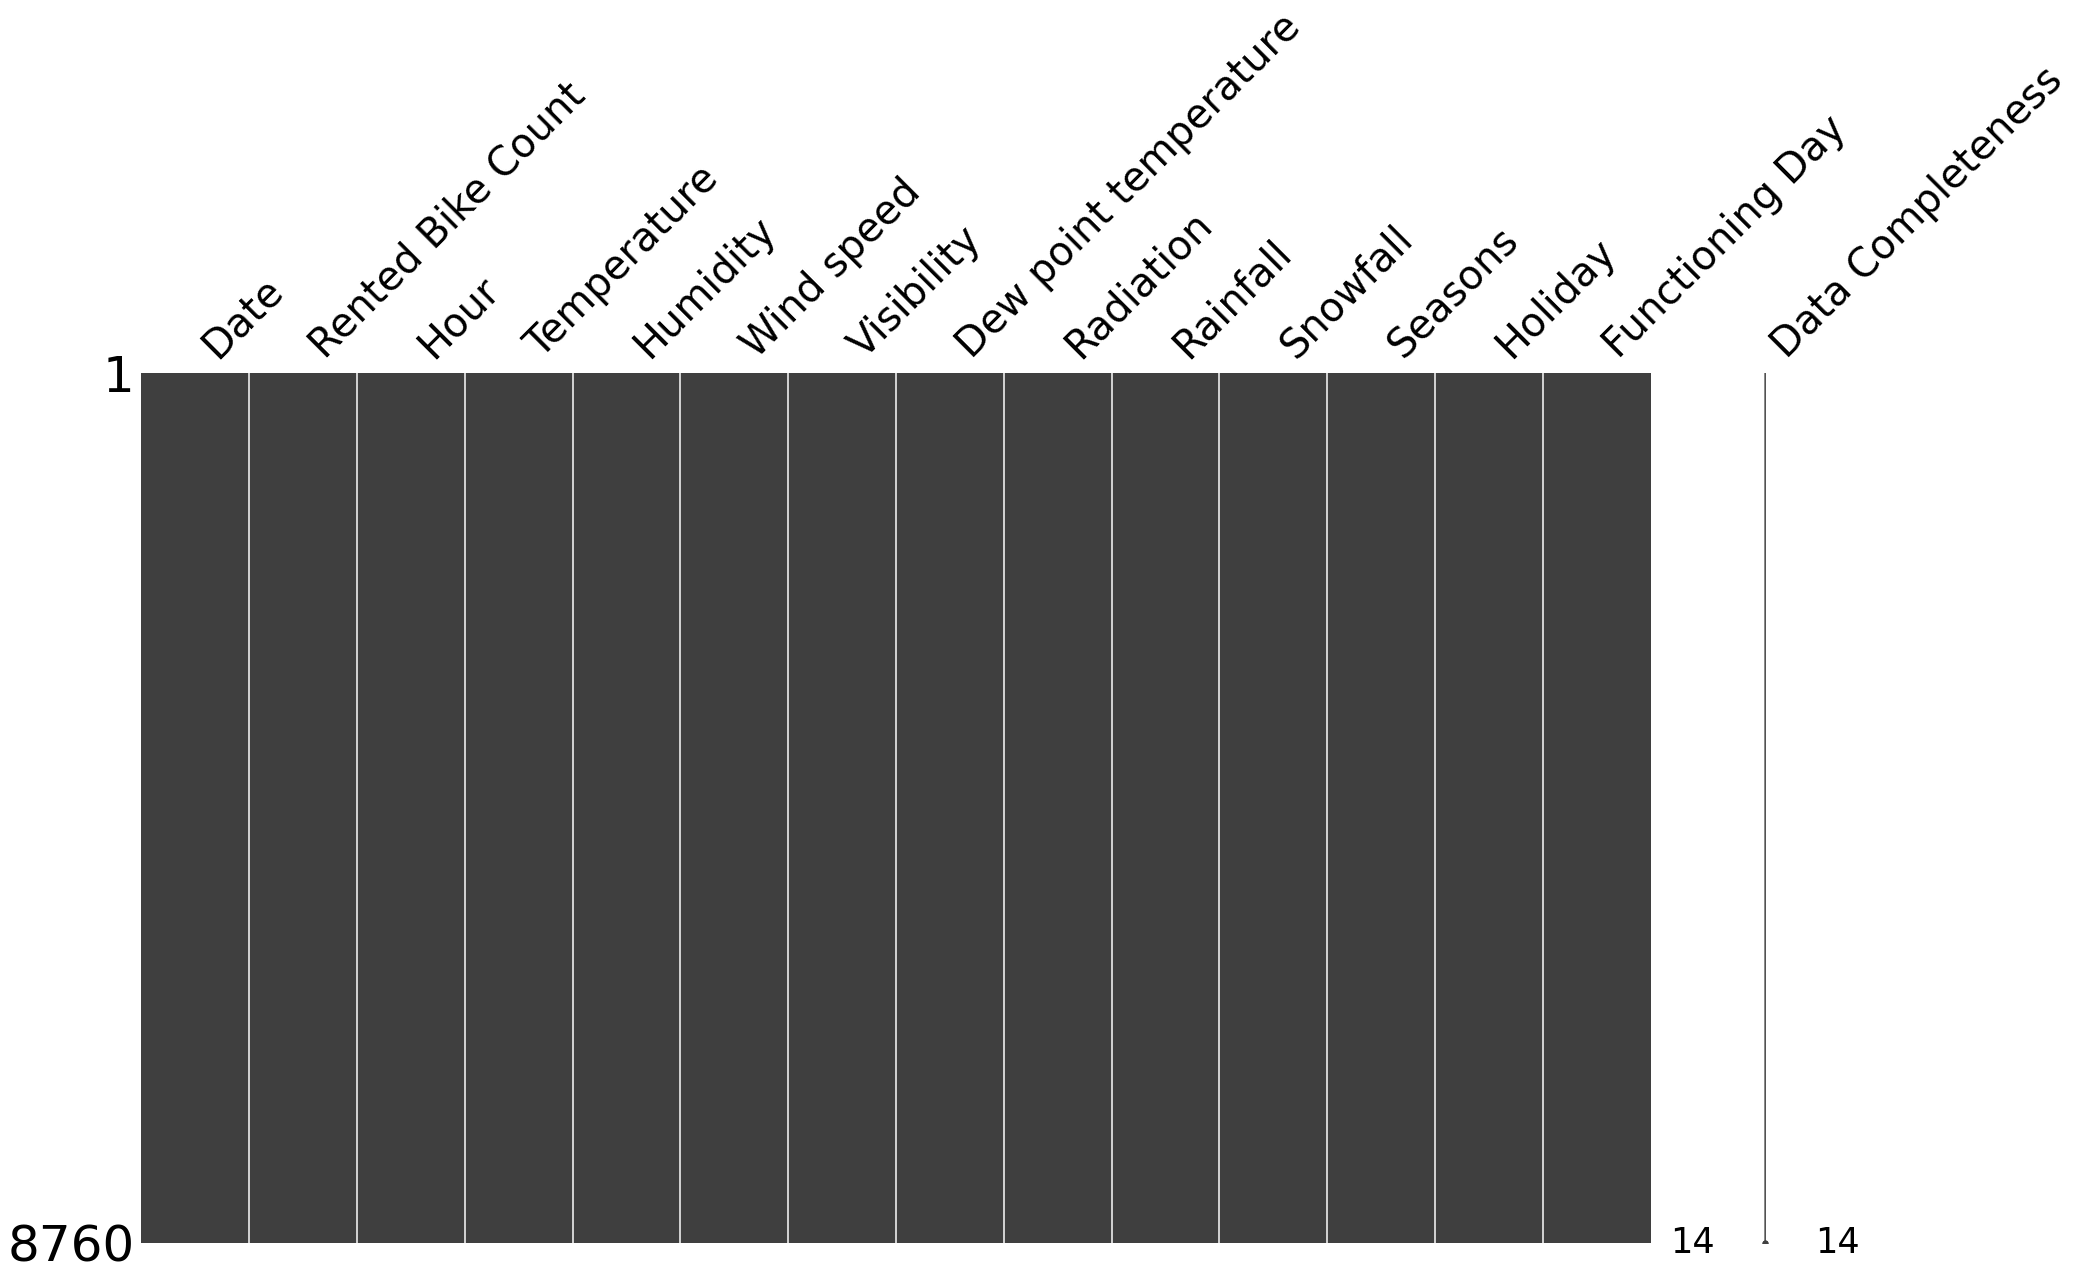

In [22]:
msno.matrix(df, labels=[df.columns], figsize=(30,16), fontsize=40)

# msno.matrix(데이터, )

### Bar Plot

Text(0.5, 0.98, 'Data distribution of continuous variables')

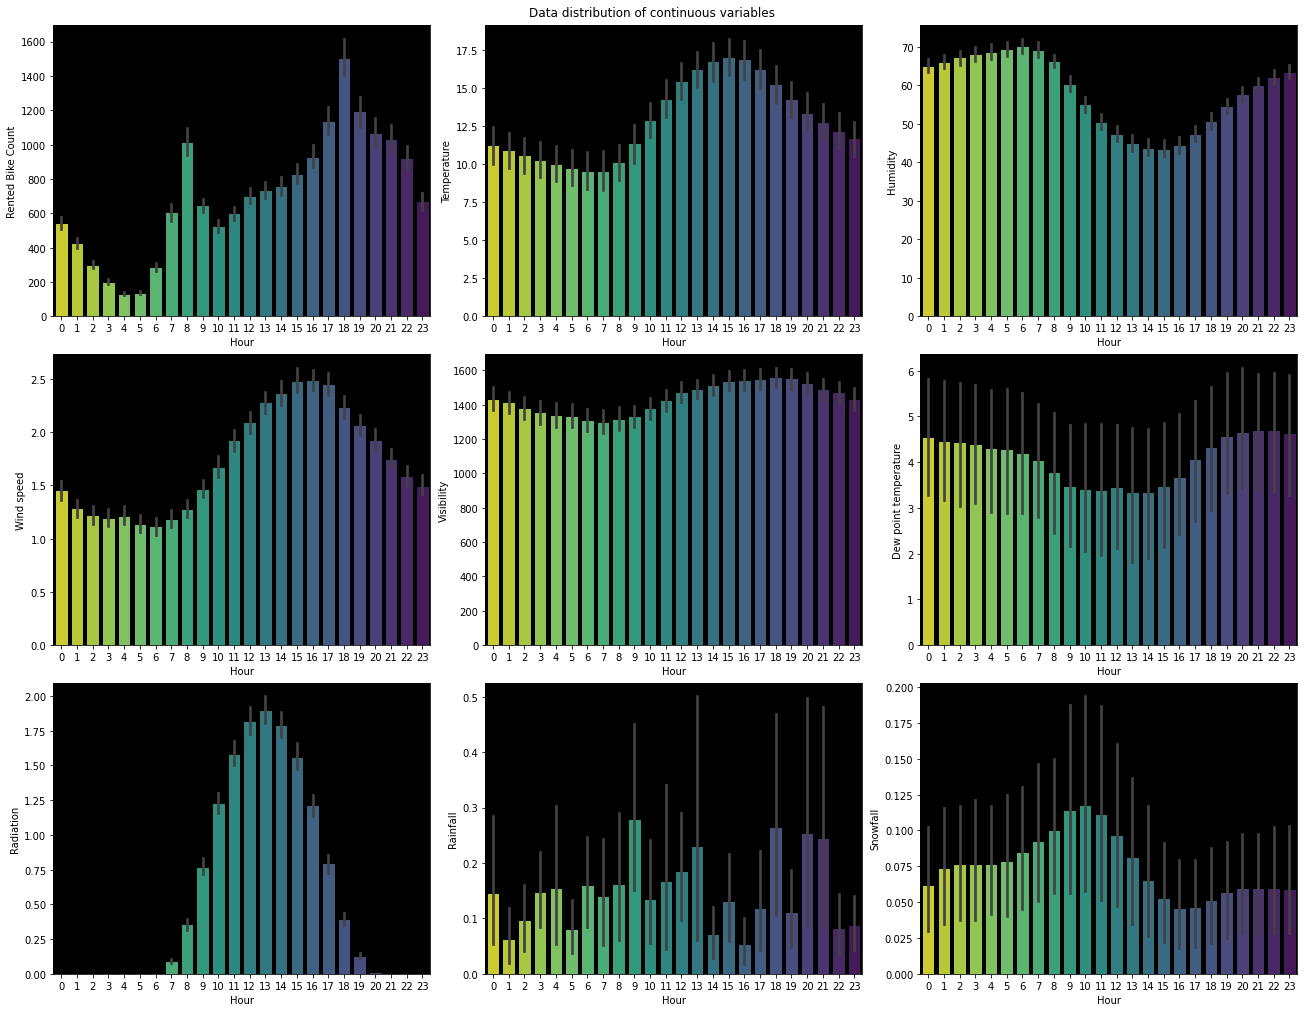

In [26]:
plt.figure(figsize=(18, 18), constrained_layout=True)
for i, col in enumerate(df.select_dtypes(include=['float64','int']).columns):
    # df.select_dtypes(include = ['타입']) 을하면 전체 데이터 중 입력한 type의 열만 가져온다.
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4,3, i+1)
    sns.barplot(data=df, x='Hour', y=col, ax=ax, edgecolor="black", palette='viridis_r')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()
# plt.tight_layout()
# plt.subplots(constrained_layout=True)
# subplots_adjust(left, bottom, right, top, wspace, hspace)
# 그래프들의 간격을 조절하는 방법들

### Checking the data distribution of each Continuous variable

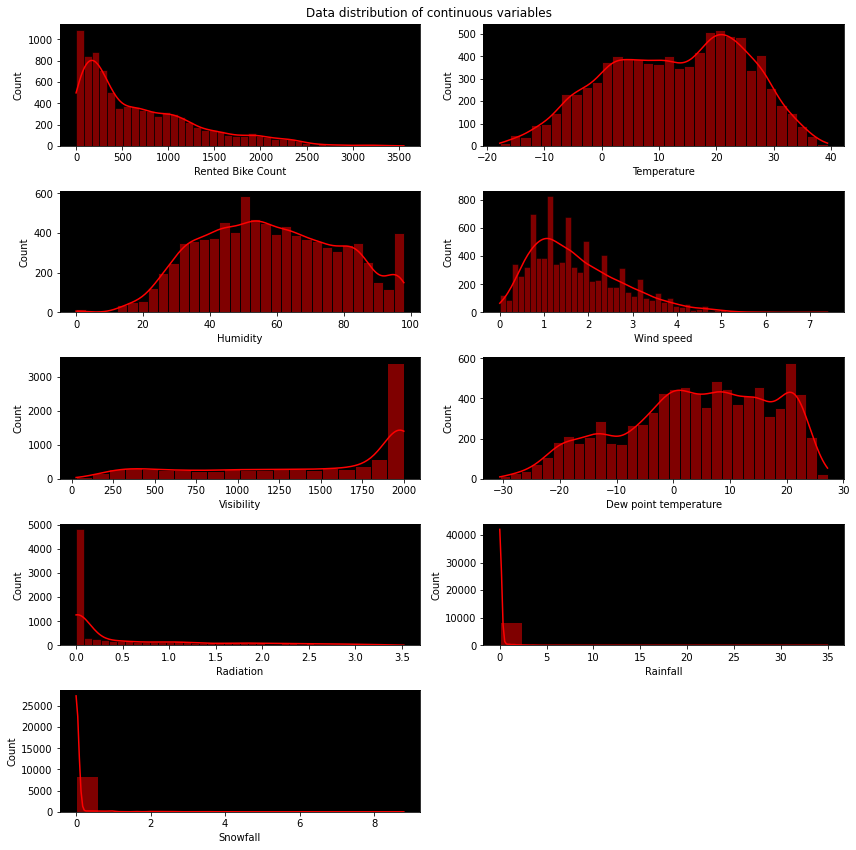

In [27]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5, 2, i+1)
    sns.histplot(data=df, x=col, ax=ax, color='red', kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

### Box Plot

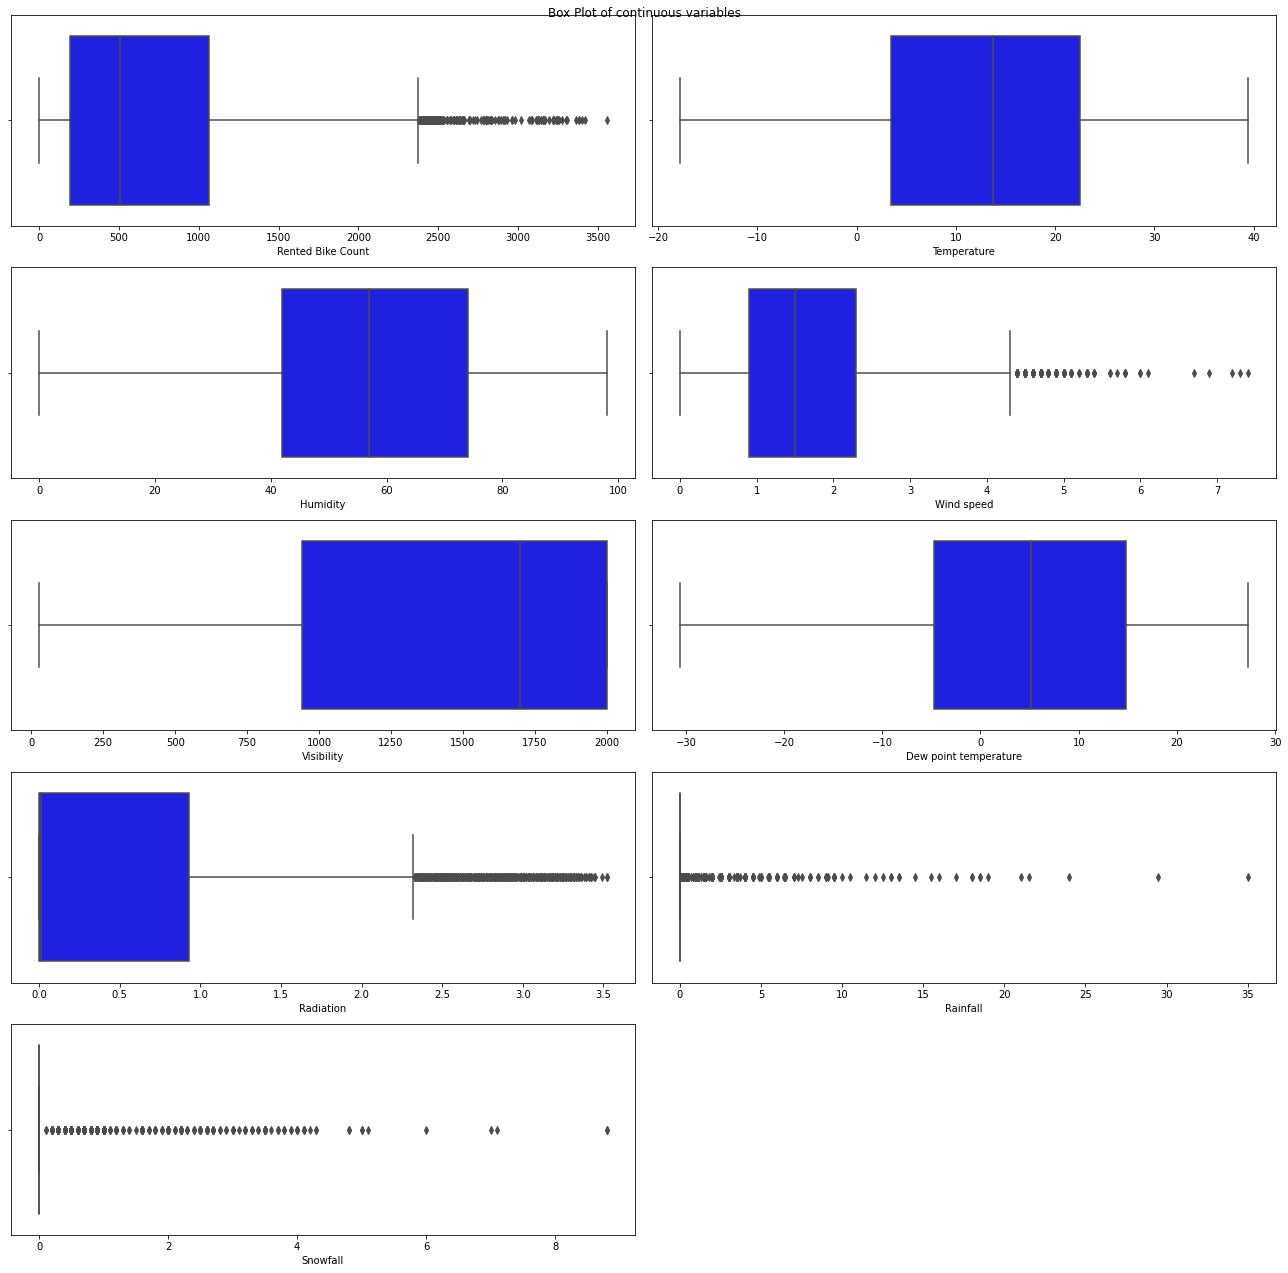

In [31]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data=df, x=col, ax=ax, color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

### Power Transformation

In [32]:
#selecting variables that have data types float and int.
var=list(df.select_dtypes(include=['float64','int64']).columns)

In [33]:
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
# Yeo–Johnson power transformation
df[var]=sc_X.fit_transform(df[var])

### Data distribution after applying Power Transformer

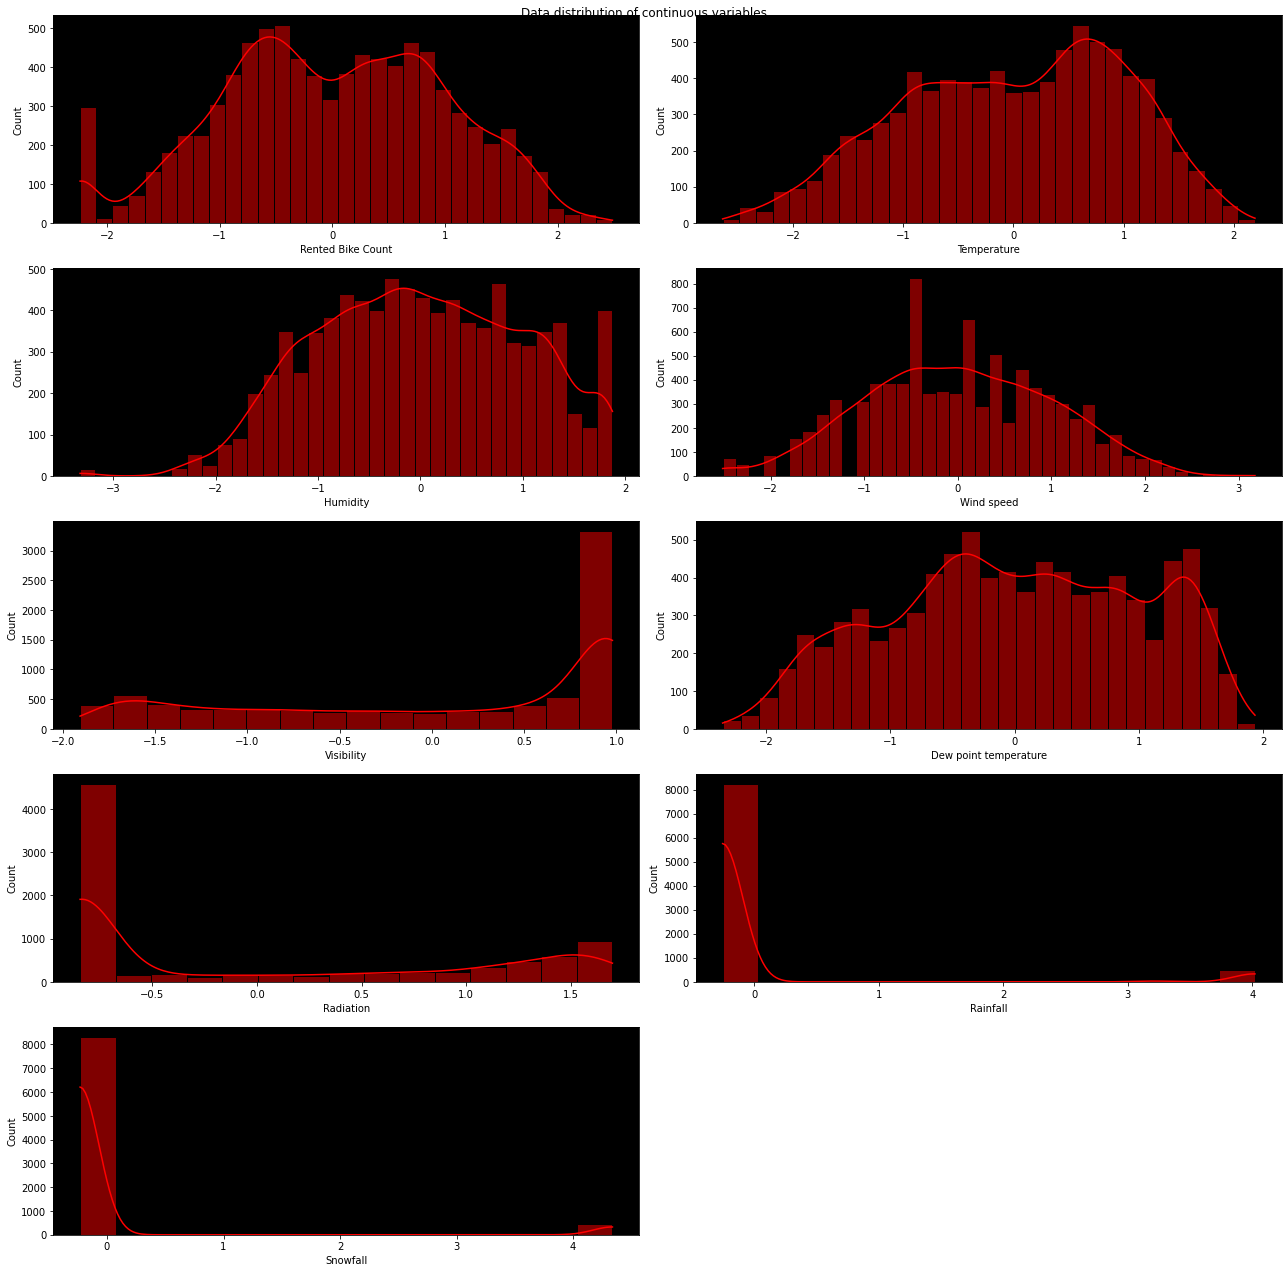

In [34]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

### Box Plot after applyig Power Transformer 

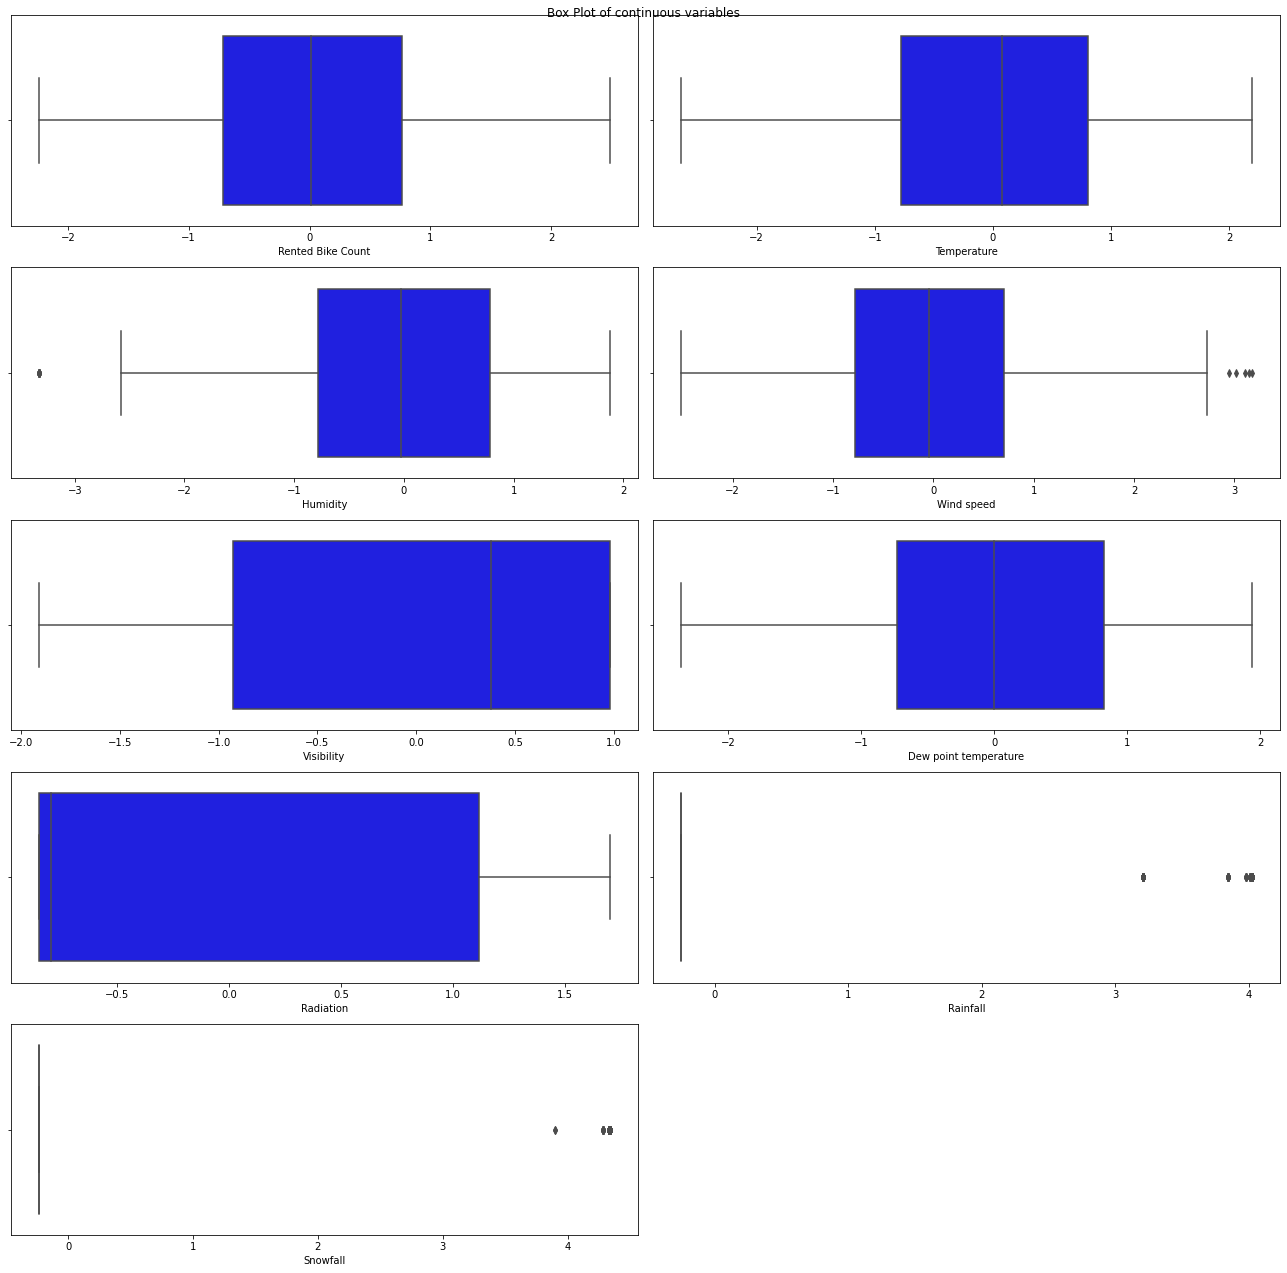

In [36]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

### Heatmap

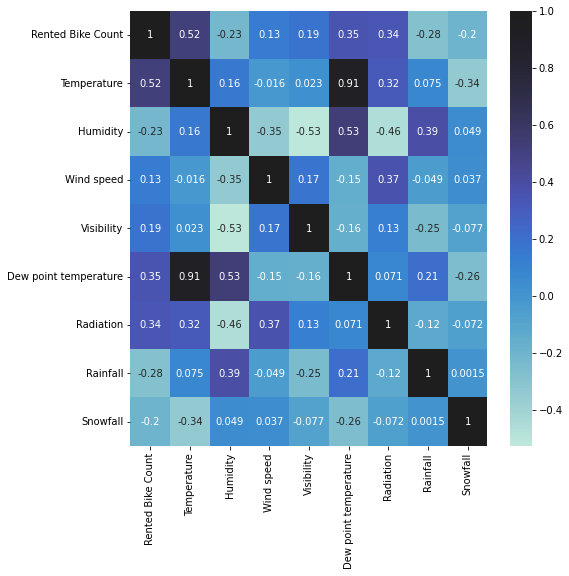

In [44]:
plt.figure(figsize=(8,8))
sns.heatmap(df.select_dtypes(include=['float']).corr(), annot=True, center=1)
plt.show()

# annot=True, True인경우 각 셀에 데이터 값을 기록한다
# center=0, 숫자에 따라 heatmap의 중심 색상을 지정한다, 입력하지 않으면 자동으로 cmap으로 변경

### Analysing Categorical Variable

### Pie Chart 

In [47]:
season_var = pd.crosstab(index=df['Seasons'], columns='% observations')
print(season_var)

col_0    % observations
Seasons                
Autumn             2184
Spring             2208
Summer             2208
Winter             2160


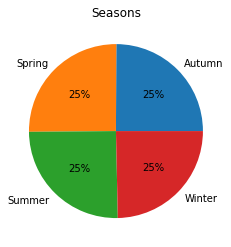

In [45]:
season_var = pd.crosstab(index=df['Seasons'], columns='% observations')
plt.pie(season_var['% observations'], labels=season_var['% observations'].index, autopct='%.0f%%')
plt.title('Seasons')
plt.show()

# pd.crosstab =, 두 개 이상의 요인에 대한 단순 교차표를 계산
# index = 행에서 그룹화할 값
# columns = 열에서 그룹화할 값, columns='% observations' 컬럼명 지정

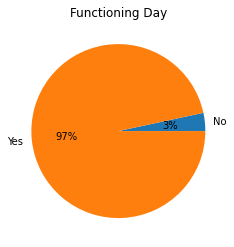

In [48]:
Functioning_Day_var=pd.crosstab(index=df['Functioning Day'],columns='% observations')
plt.pie(Functioning_Day_var['% observations'],labels=Functioning_Day_var['% observations'].index,autopct='%.0f%%')
plt.title('Functioning Day')
plt.show()

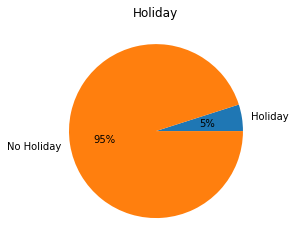

In [49]:
holiday_var=pd.crosstab(index=df['Holiday'],columns='% observations')
plt.pie(holiday_var['% observations'],labels=holiday_var['% observations'].index,autopct='%.0f%%')
plt.title('Holiday')
plt.show()

### Count plot shows that the Seasons variable is balanced 

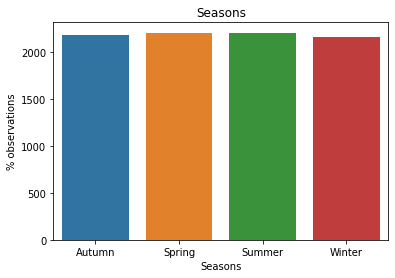

In [50]:
sns.barplot(x=season_var.index,y=season_var['% observations'])
plt.title('Seasons')
plt.show()

In [51]:
df=pd.get_dummies(df, columns=['Holiday','Seasons','Functioning Day','Hour'], drop_first=True)

In [52]:
X=df.iloc[:,2:]
y=df.iloc[:,1]

# iloc vs loc
# 행번호(row number)로 선택하는 방법 .iloc
# label이나 조건표현으로 선택하는 방법 .loc

## Feature engineering

### Variance Inflation Factor


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [54]:
calc_vif(X.select_dtypes(include=['float','int']))

,variables,VIF
0,Temperature,45.79
1,Humidity,12.01
2,Wind speed,1.23
3,Visibility,1.56
4,Dew point temperature,60.27
5,Radiation,1.86
6,Rainfall,1.20
7,Snowfall,1.17


In [55]:
del X['Dew point temperature']

# del?
# 파이썬의 예약어로 예약어 뒤에 한칸을 띄고 사용한다. if , for, or, and 등이 있다
# del array[인덱스] 형태로 사용한다

In [56]:
calc_vif(X.select_dtypes(include=['float','int']))
#Each variable is within the range between 1 and 5.

,variables,VIF
0,Temperature,1.56
1,Humidity,2.44
2,Wind speed,1.23
3,Visibility,1.50
4,Radiation,1.83
5,Rainfall,1.19
6,Snowfall,1.16


### Feature Selection 

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#Correlation

In [58]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X, y)

# 이거 뭐지

SelectKBest(k='all', score_func=<function f_regression at 0x000001C020B1FD38>)

In [59]:
feature_contribution=(fs.scores_/sum(fs.scores_))*100

### Feature importance Graph

Temperature : 24.19%
Humidity : 3.52%
Wind speed : 1.16%
Visibility : 2.43%
Radiation : 8.55%
Rainfall : 5.65%
Snowfall : 2.65%
Holiday_No Holiday : 0.53%
Seasons_Spring : 0.07%
Seasons_Summer : 6.95%
Seasons_Winter : 13.04%
Functioning Day_Yes : 13.83%
Hour_1 : 0.27%
Hour_2 : 0.91%
Hour_3 : 1.95%
Hour_4 : 3.25%
Hour_5 : 3.11%
Hour_6 : 1.15%
Hour_7 : 0.02%
Hour_8 : 0.47%
Hour_9 : 0.00%
Hour_10 : 0.05%
Hour_11 : 0.00%
Hour_12 : 0.04%
Hour_13 : 0.08%
Hour_14 : 0.11%
Hour_15 : 0.21%
Hour_16 : 0.39%
Hour_17 : 0.93%
Hour_18 : 2.18%
Hour_19 : 0.97%
Hour_20 : 0.56%
Hour_21 : 0.49%
Hour_22 : 0.28%
Hour_23 : 0.00%


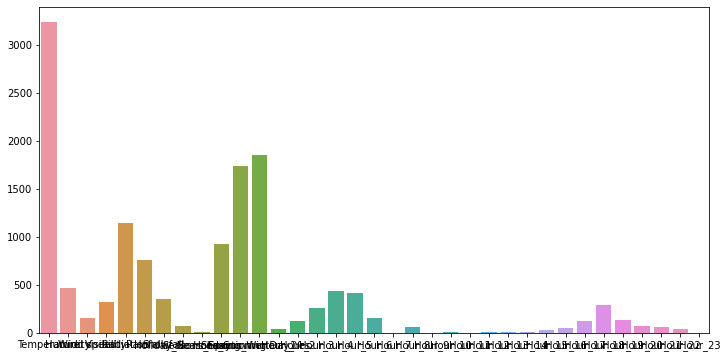

In [70]:
for i,j in enumerate(X.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
plt.figure(figsize=(12,6))
sns.barplot(x=X.columns, y=fs.scores_)
plt.show()

# 이걸 오름차순하고 싶으면 어떻게?

### Splitting our dataset into train and test set 

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
#splitting our dataset in 80% training and 20% testset
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
### Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Modeling

### Performance Measures for Regression

### K-fold Cross Validation

In [73]:
#importing different Regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score

In [74]:
#creating dictionary for storing different models accuracy
model_comparison={}

### Linear Regression 

In [75]:
model=LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")

accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))

model_comparison['Linear Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 80.76%
Model MSE : 19.16%
Cross Val Accuracy: 80.35 %
Cross Val Standard Deviation: 0.59 %


#### Linear Regression Summary

In [76]:
import statsmodels.api as sm
lin_reg=sm.OLS(y_train,X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.807
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                              726.5
Date:                Thu, 17 Nov 2022   Prob (F-statistic):                        0.00
Time:                        02:55:04   Log-Likelihood:                         -3668.0
No. Observations:                6132   AIC:                                      7406.
Df Residuals:                    6097   BIC:                                      7641.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3607      0.013     27.283      0.000       0.335       0.387
x2            -0.1188      0.010    -12.492      0.000      -0.137      -0.100
x3            -0.0206      0.007     -3.046      0.002      -0.034      -0.007
x4             0.0084      0.007      1.157      0.247      -0.006       0.023
x5             0.2291      0.017     13.603      0.000       0.196       0.262
x6            -0.2603      0.006    -40.988      0.000      -0.273      -0.248
x7            -0.0006      0.006     -0.102      0.919      -0.013       0.012
x8             0.0513      0.006      8.986      0.000       0.040       0.063
x9            -0.1030      0.007    -13.836      0.000      -0.118      -0.088
x10           -0.0957      0.009    -10.381      0.000      -0.114      -0.078
x11           -0.2716      0.010    -25.983      0.000      -0.292      -0.251
x12            0.4646      0.006     79.193      0.000       0.453       0.476
x13           -0.0427      0.008     -5.447      0.000      -0.058      -0.027
x14           -0.0908      0.008    -11.508      0.000      -0.106      -0.075
x15           -0.1212      0.008    -15.453      0.000      -0.137      -0.106
x16           -0.1727      0.008    -22.168      0.000      -0.188      -0.157
x17           -0.1624      0.008    -20.873      0.000      -0.178      -0.147
x18           -0.0758      0.008     -9.681      0.000      -0.091      -0.060
x19            0.0035      0.008      0.438      0.661      -0.012       0.019
x20            0.0594      0.008      7.047      0.000       0.043       0.076
x21           -0.0377      0.009     -4.072      0.000      -0.056      -0.020
x22           -0.1138      0.010    -11.567      0.000      -0.133      -0.095
x23           -0.1130      0.010    -11.231      0.000      -0.133      -0.093
x24           -0.0958      0.010     -9.428      0.000      -0.116      -0.076
x25           -0.1002      0.010     -9.764      0.000      -0.120      -0.080
x26           -0.0995      0.010     -9.707      0.000      -0.120      -0.079
x27           -0.0798      0.010     -7.930      0.000      -0.100      -0.060
x28           -0.0477      0.010     -4.886      0.000      -0.067      -0.029
x29            0.0128      0.009      1.391      0.164      -0.005       0.031
x30            0.1193      0.008     14.495      0.000       0.103       0.135
x31            0.0908      0.008     11.289      0.000       0.075       0.107
x32            0.0832      0.008     10.710      0.000       0.068       0.098
x33            0.0975      0.008     12.277      0.000       0.082       0.113
x34            0.0698      0.008      8.942      0.000       0.055       0.085
x35            0.0129      0.008      1.675      0.094      -

#### Assumptions of linear regression

In [77]:
residuals = lin_reg.resid
fitted_value=lin_reg.fittedvalues

In [78]:
np.mean(residuals)

0.010699177021444165

#### Checking for normality of the residuals

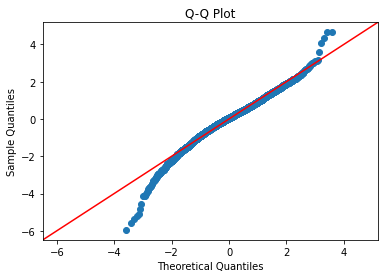

In [79]:
sm.qqplot(residuals,fit=True,line='45')
plt.title('Q-Q Plot')
plt.show()

#### Checking for homoscedasticity

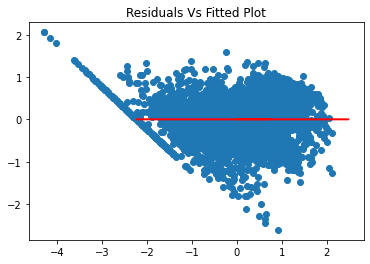

In [80]:
plt.scatter(fitted_value, residuals)
plt.plot(y_train, [0]*len(y_train),c='r')
plt.title('Residuals Vs Fitted Plot')
plt.show()

### Polynomial Regression

In [81]:
poly_reg=PolynomialFeatures(degree=2)
model=LinearRegression()
model.fit(poly_reg.fit_transform(X_train),y_train)
y_pred=model.predict(poly_reg.fit_transform(X_test))
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Polynomial Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 88.63%
Model MSE : 11.32%
Cross Val Accuracy: 80.35 %
Cross Val Standard Deviation: 0.59 %


### Decision Tree Regression

In [82]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Decision Tree Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 80.22%
Model MSE : 19.70%
Cross Val Accuracy: 78.93 %
Cross Val Standard Deviation: 0.93 %


### Random Forest Regression

In [83]:
model=RandomForestRegressor(n_estimators=10,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Random forest Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 87.32%
Model MSE : 12.63%
Cross Val Accuracy: 88.21 %
Cross Val Standard Deviation: 0.65 %


### Bagging Regressor 

In [84]:
from sklearn.ensemble import BaggingRegressor
model= BaggingRegressor(RandomForestRegressor(n_estimators=10,random_state=0),random_state=0)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Bagging Regressor']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 88.42%
Model MSE : 11.53%
Cross Val Accuracy: 89.08 %
Cross Val Standard Deviation: 0.66 %


### Stacking Regressor 

In [85]:
estimators=[('linear regression',LinearRegression()),
            ('Decision Tree',DecisionTreeRegressor()),
            ('random forest',RandomForestRegressor(n_estimators=10,random_state=0)),
            ('bagging',BaggingRegressor(RandomForestRegressor(n_estimators=10,random_state=0), random_state=0))]

In [86]:
model=StackingRegressor(estimators=estimators,final_estimator=LinearRegression(),passthrough=True)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Stacking Regressor']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 89.04%
Model MSE : 10.92%
Cross Val Accuracy: 89.73 %
Cross Val Standard Deviation: 0.58 %


### Model Comparison 

In [87]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['R-Square','MSE','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='R-Square',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='RdYlBu_r')

,R-Square,MSE,CV Accuracy,CV std
Stacking Regressor,89.04%,10.92%,89.73%,0.58%
Polynomial Regression,88.63%,11.32%,80.35%,0.59%
Bagging Regressor,88.42%,11.53%,89.08%,0.66%
Random forest Regression,87.32%,12.63%,88.21%,0.65%
Linear Regression,80.76%,19.16%,80.35%,0.59%
Decision Tree Regression,80.22%,19.70%,78.93%,0.93%


#### Maximum Accuracies in each Column 

In [88]:
Model_com_df.style.highlight_max().set_caption("Maximum Score in each Column").format("{:.2%}")

,R-Square,MSE,CV Accuracy,CV std
Stacking Regressor,89.04%,10.92%,89.73%,0.58%
Polynomial Regression,88.63%,11.32%,80.35%,0.59%
Bagging Regressor,88.42%,11.53%,89.08%,0.66%
Random forest Regression,87.32%,12.63%,88.21%,0.65%
Linear Regression,80.76%,19.16%,80.35%,0.59%
Decision Tree Regression,80.22%,19.70%,78.93%,0.93%


#### Minimum Accuracies in each Column

In [89]:
Model_com_df.style.highlight_min().set_caption("Minimum Score in each Column").format("{:.2%}")

,R-Square,MSE,CV Accuracy,CV std
Stacking Regressor,89.04%,10.92%,89.73%,0.58%
Polynomial Regression,88.63%,11.32%,80.35%,0.59%
Bagging Regressor,88.42%,11.53%,89.08%,0.66%
Random forest Regression,87.32%,12.63%,88.21%,0.65%
Linear Regression,80.76%,19.16%,80.35%,0.59%
Decision Tree Regression,80.22%,19.70%,78.93%,0.93%
